In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

In [2]:
bank_data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
#pd.set_option('display.max_rows', 368) # afficher le nombre total de lignes
bank_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 1.analyse exploratoire de données


## **objectif**:

-**comprendre au mieux nos données**

-**trouver la meilleure stratégie de modelisation**

-**construire une fonction predictive**

## **checklist de base**
### **Analyse de la forme :**
- **variable target :** loan_status  
- **nombre de lignes et de colonnes :**  (614,13)
- **types de variables :**  8 variables de type object et 5 variables de type numérique (3 variables de type float et 2 variables de type int)
- **analyse de valeurs manquantes :** on distinge de groupes: celui ne presentant pas de valeurs manquantes et celui presentant des valeurs maquantes mais à un taux treès faible (<0.08)

### **analyse de fond :**
- **visualisation du target :** 422 (69 % environ) prêts accordés et 192 (31 % envoiron) rejetés dans notre jeux de données
- **signification des variables :** on remarque un forte corrélation positive entre le revenu ( ApplicantIncome) de l'applicant et le montant du prêt (LoanAmount) qui lui est accordé => relation à surveiller de près dans notre modélisation
- **relation variable/target :**

# Analyse de la forme 

In [3]:
df=bank_data.copy()

In [4]:
df.shape

(614, 13)

In [5]:
 #df.dtypes.value_counts()  
 bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


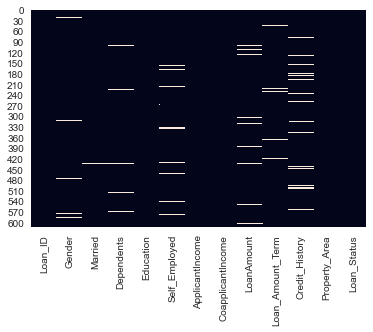

In [6]:
#,visualisation de valeurs manquantes de notre dataset
sns.heatmap(df.isna(),cbar=False)

In [7]:
# nombre de valeurs manquantes pour chaque variables 
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# proportion de valeurs manquantes pour chaque variable 
df.isna().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Analyse de fond 


- **visualisation de la statistique (un bref résumé) et des correlations entre variables continue de notre base de données**

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


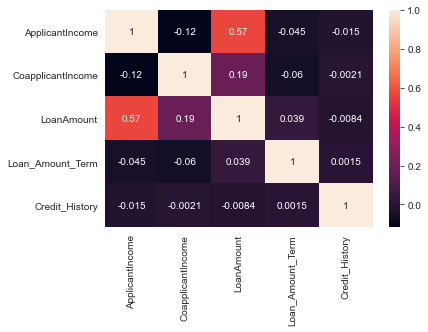

In [10]:
sns.heatmap(df.corr(),annot=True)

 - **visualisation de la statistique (un bref résumé) et des correlations entre variables catégoriques de notre base de données**

In [11]:
# statistique des variables catégoriques
df.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001489,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### **decompostion de notre base de données en 2 bases ( catégoriques et numériques )**

In [12]:
df_cat=pd.DataFrame()
df_num=pd.DataFrame()
for i,col in enumerate(df.dtypes):
    if col==object:
        df_cat=pd.concat([df_cat,pd.DataFrame(df.iloc[:,i])],axis=1)
    else:
        df_num=pd.concat([df_num,pd.DataFrame(df.iloc[:,i])], axis=1)
df_num.head() # def_cat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [13]:
# remplacer tout les modalités manquantes par la modalité qui apparait le plus dans la variable  
df_cat=df_cat.apply(lambda x : x.fillna(x.value_counts().index[1]))
df_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [14]:
#remplacer toutes les valeurs manquantes par les valeurs qui les suivent directement
df_num=df_num.apply( lambda x : x.fillna(method='bfill'))
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


  - ***histogramme des variables categoriques***

Gender--------------------------------------------['Male' 'Female']


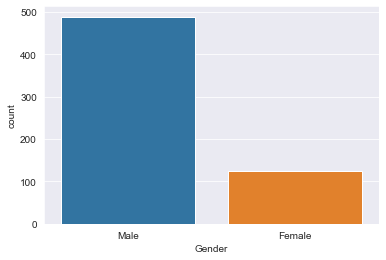

Married-------------------------------------------['No' 'Yes']


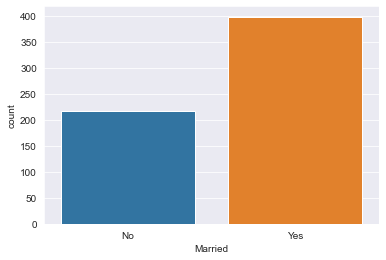

Dependents----------------------------------------['0' '1' '2' '3+']


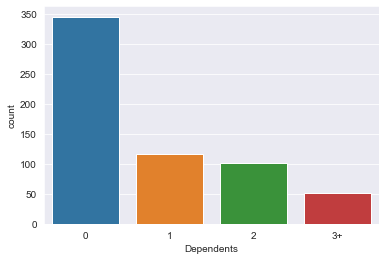

Education-----------------------------------------['Graduate' 'Not Graduate']


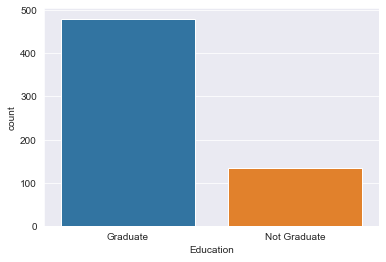

Self_Employed-------------------------------------['No' 'Yes']


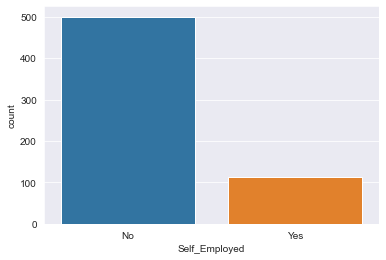

Property_Area-------------------------------------['Urban' 'Rural' 'Semiurban']


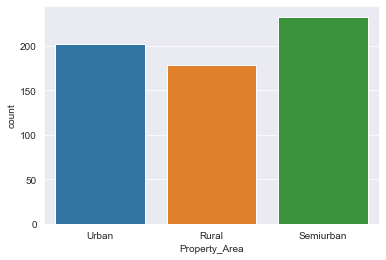

Loan_Status---------------------------------------['Y' 'N']


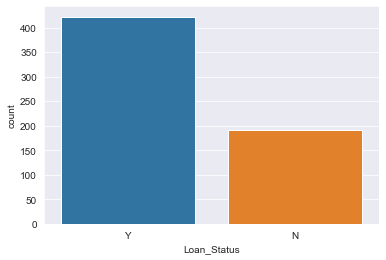

In [15]:

for col in df_cat.drop("Loan_ID",axis=1):
    print(f'{col:-<50}{df_cat[col].unique()}')
    sns.countplot(df_cat[col])
    plt.show()

## ***Relations entre variable target et variables explicatives*** 

   - ***Relation entre variable target (loan_Status) et variables catégoriques***

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


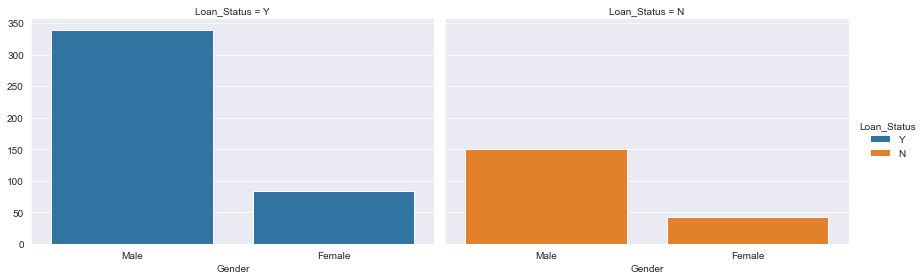

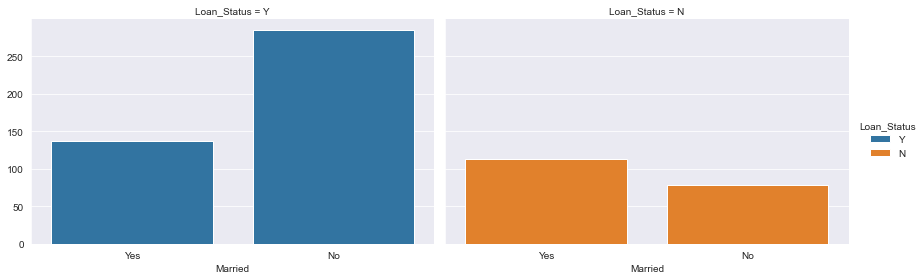

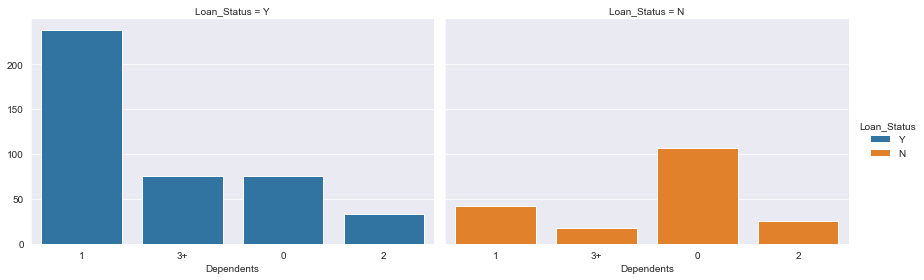

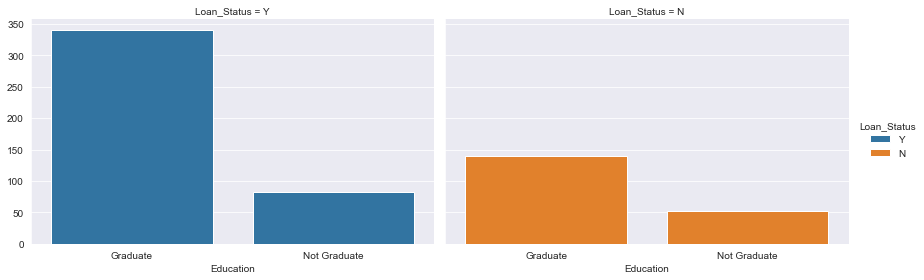

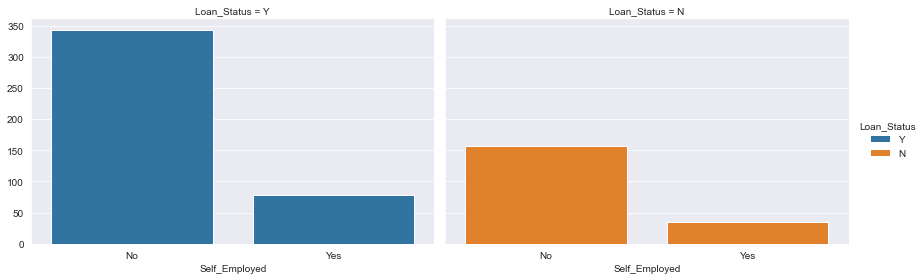

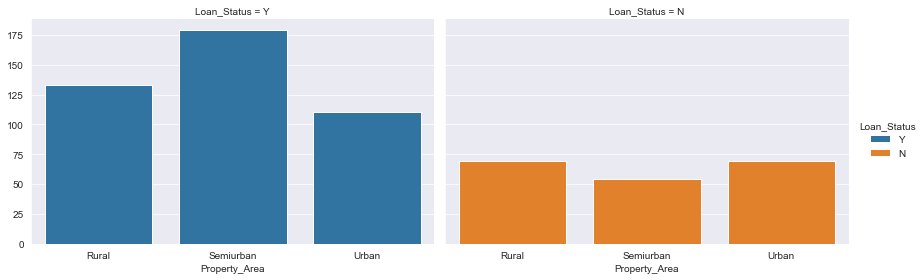

In [16]:
for col in ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]:
    grid=sns.FacetGrid(df_cat,col="Loan_Status", hue="Loan_Status", size=4,aspect=1.5)
    grid.map(sns.countplot,col).add_legend()
    plt.show()

- ***Relation entre variable target (Loan_status) et variables numériques***

relation entre loan_status et ApplicantIncome


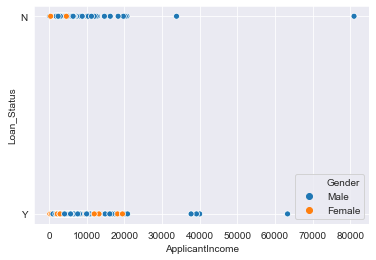

relation entre loan_status et CoapplicantIncome


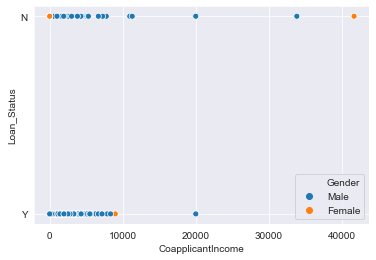

relation entre loan_status et LoanAmount


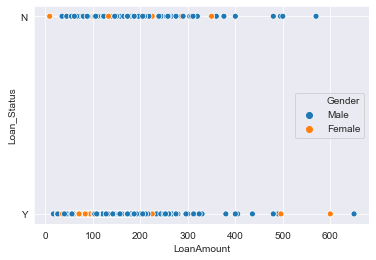

relation entre loan_status et Loan_Amount_Term


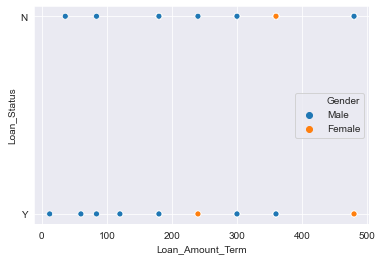

relation entre loan_status et Credit_History


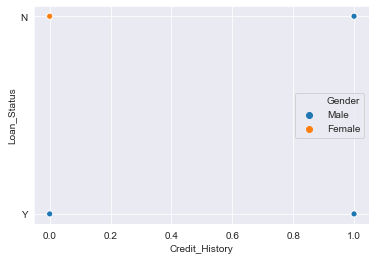

In [17]:
for col in ["ApplicantIncome","CoapplicantIncome","LoanAmount", "Loan_Amount_Term","Credit_History"]:
    print(f'relation entre loan_status et {col}')
    sns.scatterplot(df_num[col],df["Loan_Status"],hue=df["Gender"],sizes=(20,200))
    plt.show()

In [18]:
target_valeur={"Y":1,
               "N":0}

df_cat['loan_status.']=df_cat["Loan_Status"].map(target_valeur) 
df_cat.drop(["Loan_ID","Loan_Status"],axis=1,inplace=True)
df_cat


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,loan_status.
0,Male,No,0,Graduate,No,Urban,1
1,Male,Yes,1,Graduate,No,Rural,0
2,Male,Yes,0,Graduate,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,Urban,1
4,Male,No,0,Graduate,No,Urban,1
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1
610,Male,Yes,3+,Graduate,No,Rural,1
611,Male,Yes,1,Graduate,No,Urban,1
612,Male,Yes,2,Graduate,No,Urban,1


In [19]:
#remplacer les valeur catégoriques par 0,1,...
# 0:No, Graduate,No 
# 1: married, male,rural,yes
# 2:Urban
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,loan_status.
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


## ***reconstitution de notre base de données nettoyée***

In [30]:
bank=pd.concat([df_num,df_cat],axis=1)
bank

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,loan_status.
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,3,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,2,1
612,7583,0.0,187.0,360.0,1.0,1,1,2,0,0,2,1


In [32]:
# visualisation du Loan_statit pour verifier s'il y'a équilibre
bank["loan_status."].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: loan_status., dtype: float64

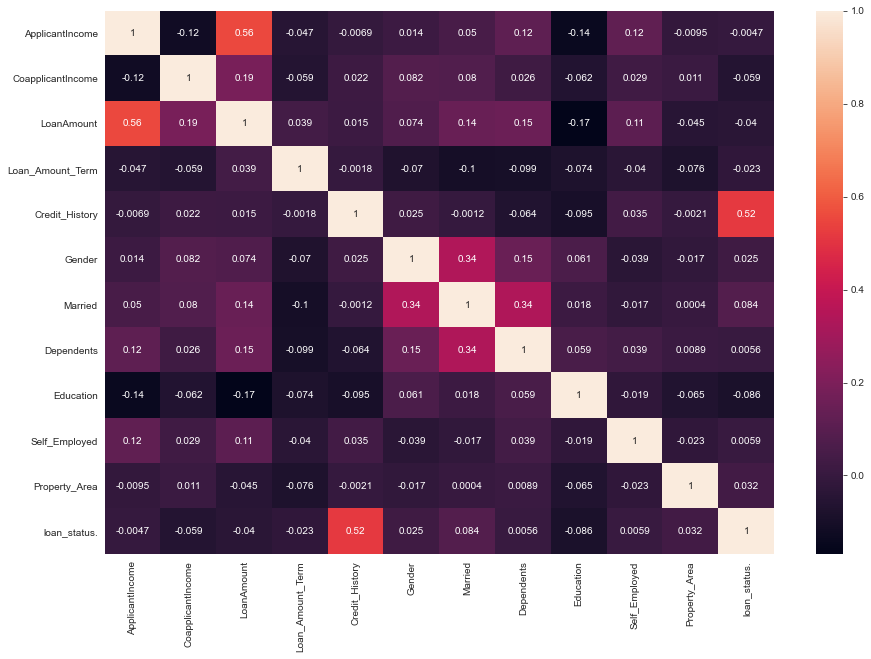

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(bank.corr(),annot=True)

In [35]:
Y=bank["loan_status."]
X=bank.drop("loan_status.",axis=1)

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.4,random_state=42)
for train,test in sss.split(X,Y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    Y_train,Y_test=Y.iloc[train],Y.iloc[test]
print(f"la taille de l'echantillon test est:{X_test.shape}" )
print(f"la taille de l'echantillon test d'entrainnement est:{X_train.shape}" )

la taille de l'echantillon test est:(246, 11)
la taille de l'echantillon test d'entrainnement est:(368, 11)


### - **application de trois algorithmes : regression logistic,KNN,DecisionTree**

In [36]:
models={
    "LogisticRegression": LogisticRegression(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=1,random_state=42)
}
def accurace(Y_true,Y_pred,retu=False):
    acc=accuracy_score(Y_true,Y_pred)
    if retu:
        return acc 
    else:
        print(f'la precision du modèle est:{acc}')
def train_test_evaluation(models,X_train,Y_train,X_test,Y_test):
    for name, model in models.items():
        print(name,":")
        model.fit(X_train,Y_train)
        accurace(Y_test,model.predict(X_test))
        print("--"*10)
train_test_evaluation(models,X_train,Y_train,X_test,Y_test)

LogisticRegression :
la precision du modèle est:0.8008130081300813
--------------------
KNeighborsClassifier :
la precision du modèle est:0.6260162601626016
--------------------
DecisionTreeClassifier :
la precision du modèle est:0.8089430894308943
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
